# Data Scraping

In [3]:
import praw
import pandas as pd
import nltk
from matplotlib import pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Set up Reddit API credentials
reddit = praw.Reddit(client_id='CLIENT_ID',
                     client_secret='CLIENT_SECRET',
                     user_agent='USER_AGENT')

# Define subreddit and scrape posts
subreddit = reddit.subreddit('stocks')  
posts = []

for post in subreddit.hot(limit=100):  
    posts.append([post.title, post.selftext, post.score, post.url, post.created_utc])

# Create a DataFrame to store the scraped data
df = pd.DataFrame(posts, columns=['Title', 'Text', 'Score', 'URL', 'Timestamp'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df.head()


,Title,Text,Score,URL,Timestamp
0,Rate My Portfolio - r/Stocks Quarterly Thread ...,Please use this thread to discuss your portfol...,11,https://www.reddit.com/r/stocks/comments/1h403...,2024-12-01 10:00:22
1,r/Stocks Daily Discussion & Technicals Tuesday...,"This is the daily discussion, so anything stoc...",8,https://www.reddit.com/r/stocks/comments/1h5kh...,2024-12-03 10:30:10
2,"How on Earth? $AAPL, $WMT, $COST","These companies have ridiculous PE ratio's, th...",214,https://www.reddit.com/r/stocks/comments/1h5wx...,2024-12-03 20:15:18
3,Name a large-cap stock and its small-cap compe...,I am always looking for small/mid-cap companie...,54,https://www.reddit.com/r/stocks/comments/1h62r...,2024-12-04 00:21:36
4,Tesla CEO Elon Musk loses bid to get $56 billi...,"A Delaware judge ruled on Monday that Tesla, C...",5220,https://www.reddit.com/r/stocks/comments/1h57c...,2024-12-02 22:10:38


# Data Analysis (Sentiment Analysis & Visualization)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/noorshaik/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


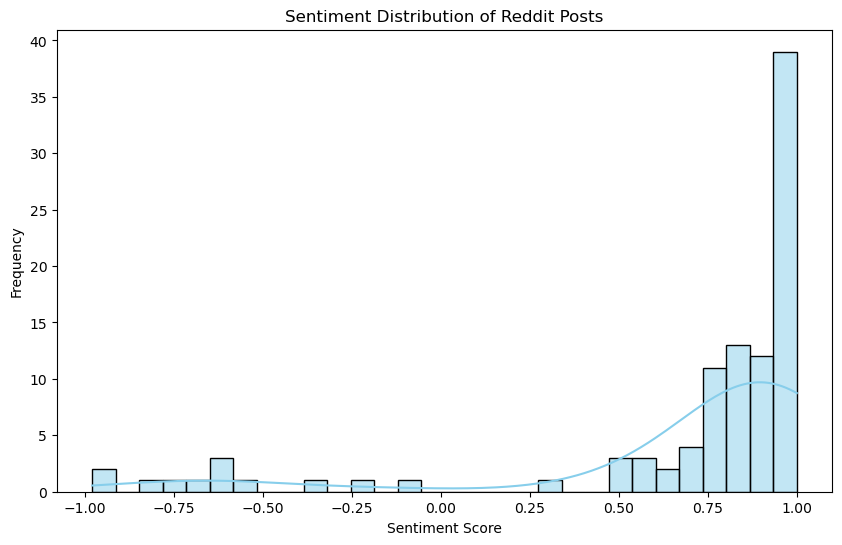

In [6]:
# Initialize SentimentIntensityAnalyzer
import seaborn as sns
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis on title and text
df['Sentiment'] = df['Text'].apply(get_sentiment)

# Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Sentiment Distribution of Reddit Posts')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


# Visualization - Sentiment Over Time:

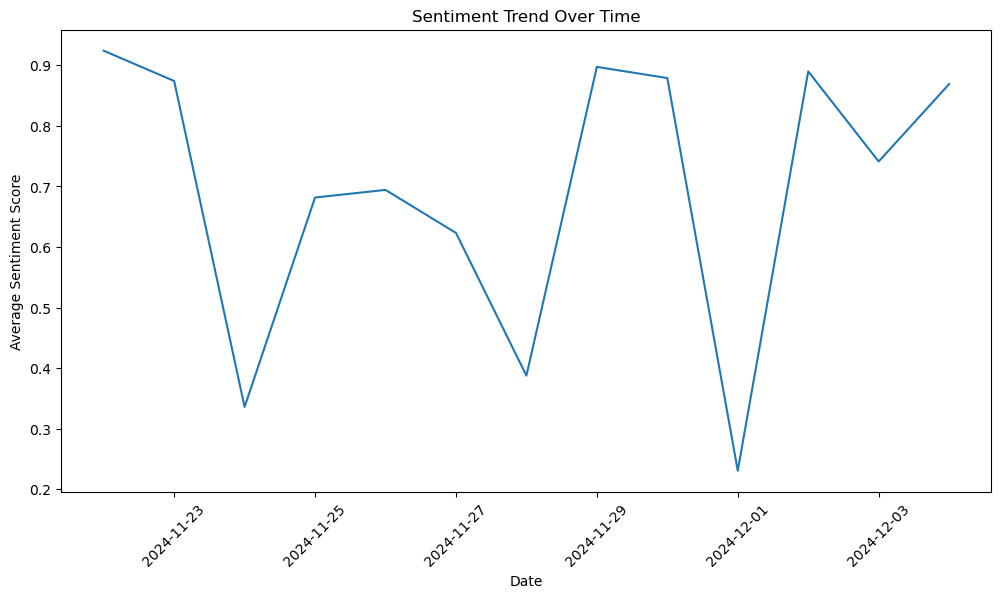

In [7]:
# Plot sentiment over time (if you want to see trends)
df['Date'] = df['Timestamp'].dt.date
sentiment_by_date = df.groupby('Date')['Sentiment'].mean()

plt.figure(figsize=(12, 6))
sentiment_by_date.plot()
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()


# Visualization - Distribution of Post Scores 

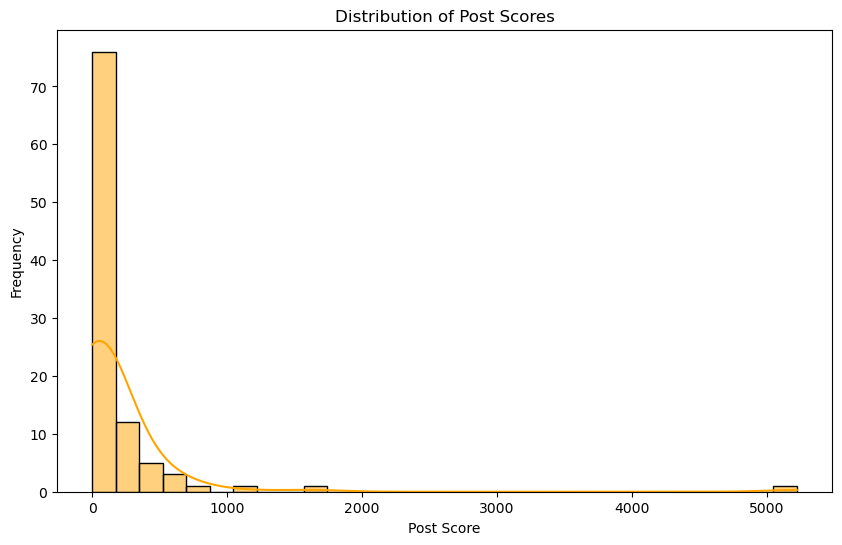

In [8]:
# Post Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], bins=30, kde=True, color='orange')
plt.title('Distribution of Post Scores')
plt.xlabel('Post Score')
plt.ylabel('Frequency')
plt.show()


# Visualization - Most Frequent Words in Reddit Post Titles

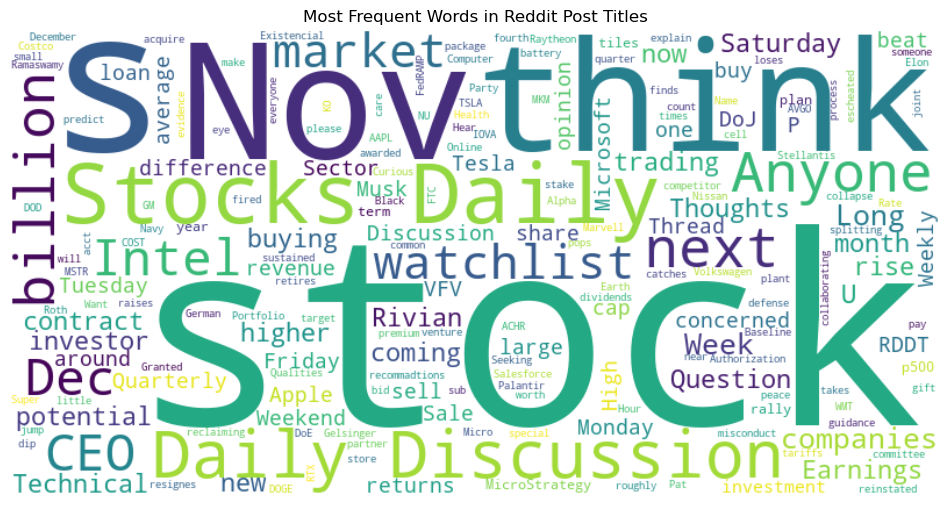

In [9]:
from wordcloud import WordCloud

# Join all titles and create a word cloud
all_titles = ' '.join(df['Title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Reddit Post Titles')
plt.show()


# Visualization - Sentiment vs Post Score

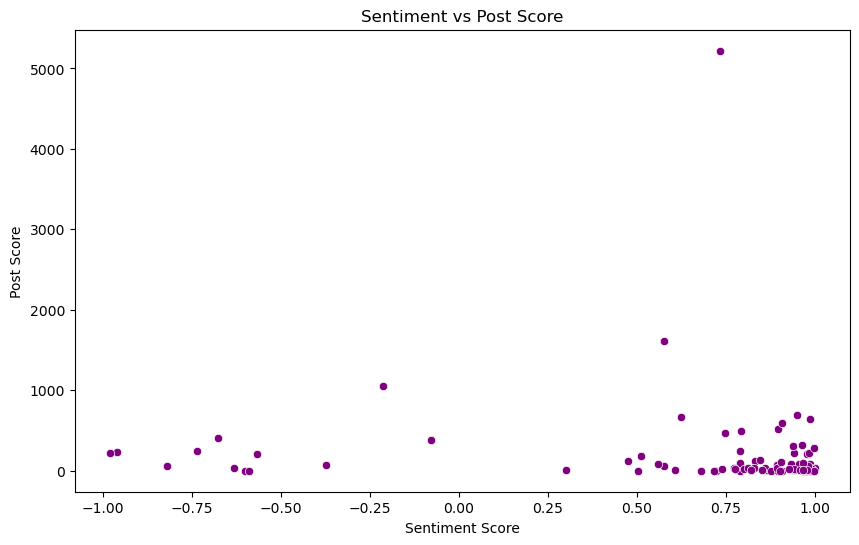

In [10]:
# Correlation between sentiment and post score
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Sentiment'], y=df['Score'], color='purple')
plt.title('Sentiment vs Post Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Post Score')
plt.show()


# Visualization:TextBlob Sentiment Distribution of Reddit Posts

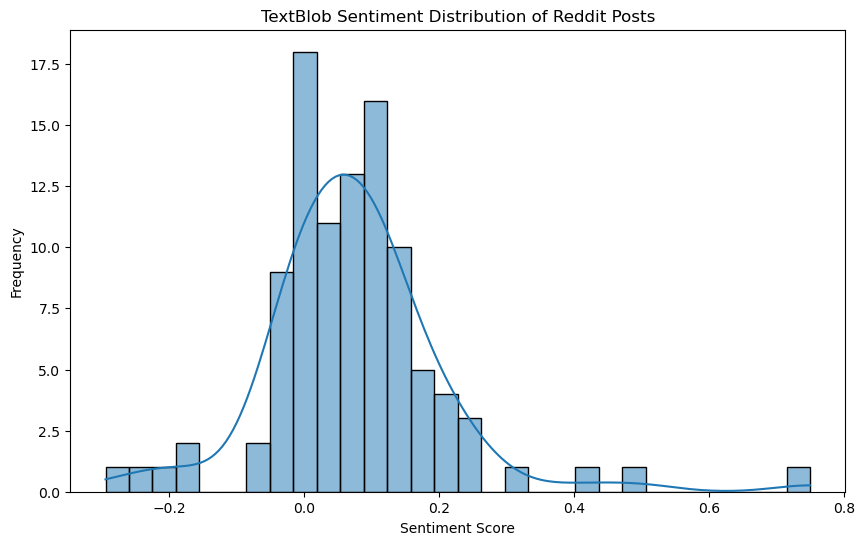

In [11]:
from textblob import TextBlob

# Function to calculate sentiment using TextBlob
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply TextBlob sentiment analysis
df['TextBlob_Sentiment'] = df['Text'].apply(get_textblob_sentiment)

# Visualize the sentiment distribution using TextBlob
plt.figure(figsize=(10, 6))
sns.histplot(df['TextBlob_Sentiment'], bins=30, kde=True)
plt.title('TextBlob Sentiment Distribution of Reddit Posts')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


# Model Prediction

In [13]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a target variable (dummy example: if sentiment > 0, we predict 'Positive Stock Movement')
df['Stock_Movement'] = df['Sentiment'].apply(lambda x: 1 if x > 0 else 0)

# Prepare features (sentiment) and target variable (Stock Movement)
X = df[['Sentiment']]  # Features
y = df['Stock_Movement']  # Target

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.96      1.00      0.98        25

    accuracy                           0.97        30
   macro avg       0.98      0.90      0.93        30
weighted avg       0.97      0.97      0.97        30

